## Customer Churn Prediction

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [3]:
# Load the dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning

In [4]:
# Check the general information of the dataset
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

In [6]:
df_info, missing_values

(None,
 customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64)

In [7]:
# Convert the TotalCharges column to numeric, marking errors as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any NaN values in the TotalCharges column
nan_totalcharges = df[df['TotalCharges'].isna()]

nan_totalcharges[['customerID', 'TotalCharges', 'tenure', 'MonthlyCharges']]

,customerID,TotalCharges,tenure,MonthlyCharges
488,4472-LVYGI,NaN,0,52.55
753,3115-CZMZD,NaN,0,20.25
936,5709-LVOEQ,NaN,0,80.85
1082,4367-NUYAO,NaN,0,25.75
1340,1371-DWPAZ,NaN,0,56.05
3331,7644-OMVMY,NaN,0,19.85
3826,3213-VVOLG,NaN,0,25.35
4380,2520-SGTTA,NaN,0,20.00
5218,2923-ARZLG,NaN,0,19.70
6670,4075-WKNIU,NaN,0,73.35


In [8]:
# Replace NaN values in TotalCharges with 0
df['TotalCharges'].fillna(0, inplace=True)

# Verify if the NaN values are replaced
nan_totalcharges_after = df['TotalCharges'].isna().sum()

nan_totalcharges_after

0

### EDA

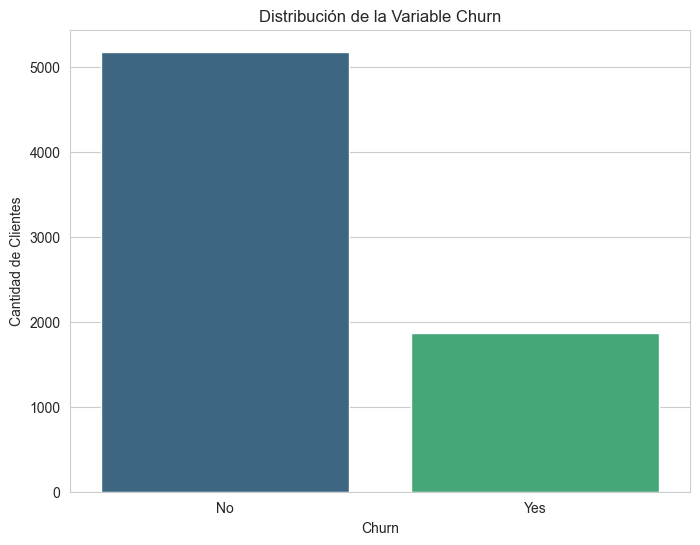

In [9]:
# Set style for seaborn
sns.set_style('whitegrid')

# Plot distribution of Churn variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de la Variable Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

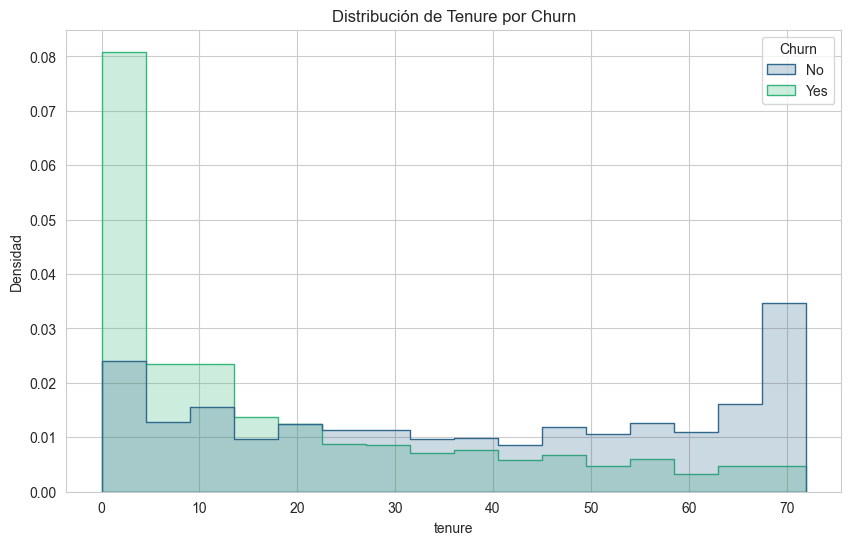

In [10]:
# Plot distribution of tenure by Churn
plt.figure(figsize=(10, 6))
sns.histplot(df, x='tenure', hue='Churn', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Distribución de Tenure por Churn')
plt.ylabel('Densidad')
plt.show()

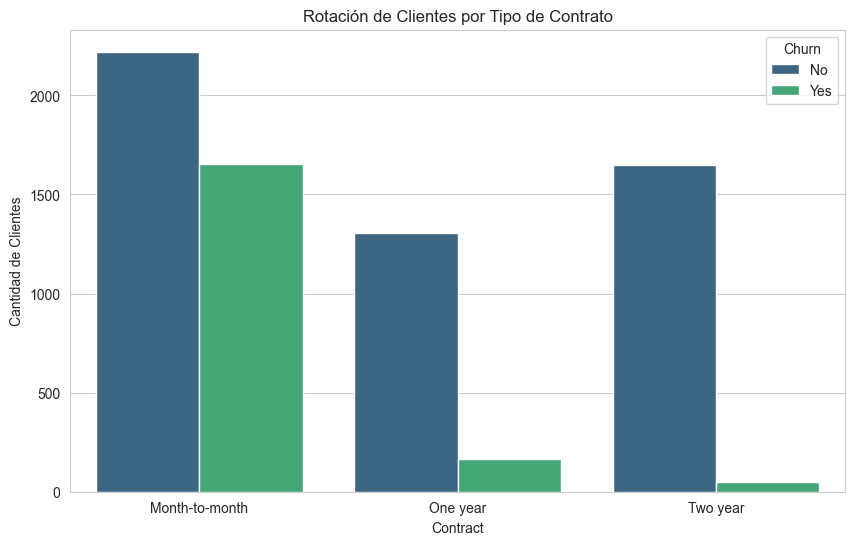

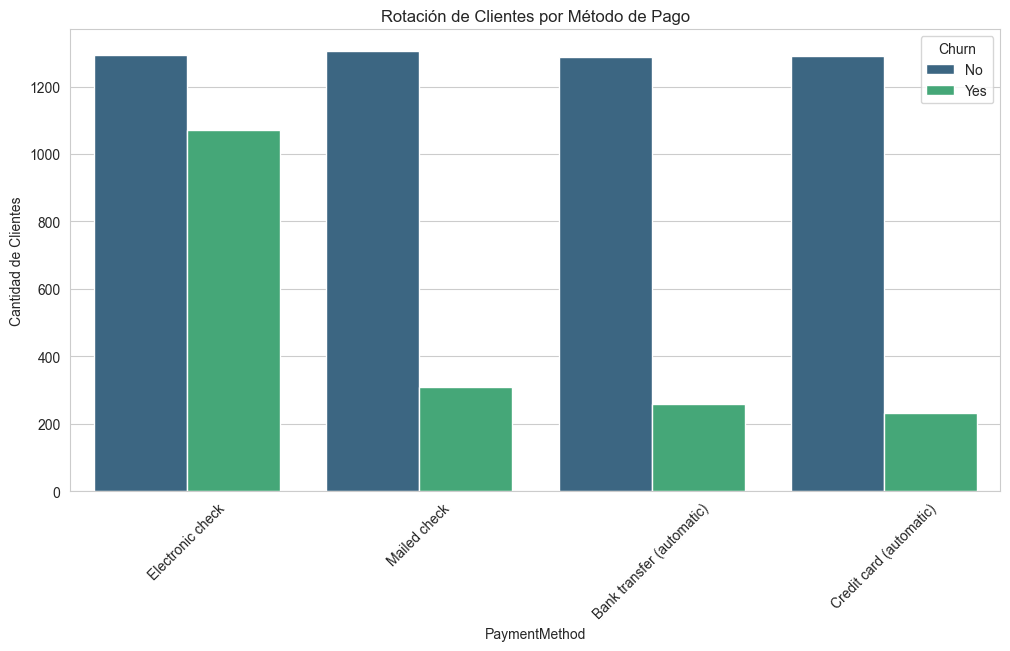

In [11]:
# Plot Churn by Contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Rotación de Clientes por Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.show()

# Plot Churn by PaymentMethod
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Rotación de Clientes por Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

### Feature Engineering

In [12]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

# Verify the change
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


In [14]:
from sklearn.preprocessing import StandardScaler

# Features to be scaled
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

# Display the first few rows of the scaled dataset
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.992611,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.172165,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.958066,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.193672,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.938874,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((4930, 30), (2113, 30))

### Training Models

In [16]:
import mlflow
import os

os.environ["AWS_PROFILE"] = "jvaa-of" # fill in with your AWS profile. More info: https://docs.aws.amazon.com/sdk-for-java/latest/developer-guide/setup.html#setup-credentials

TRACKING_SERVER_HOST = "ec2-44-201-196-116.compute-1.amazonaws.com" # fill in with the public DNS of the EC2 instance
mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:5000")

In [17]:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://ec2-44-201-196-116.compute-1.amazonaws.com:5000'


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [19]:
mlflow.set_experiment("Telco Churn Model Selection")

<Experiment: artifact_location='s3://vld-test-mlflow/3', creation_time=1692238965828, experiment_id='3', last_update_time=1692238965828, lifecycle_stage='active', name='Telco Churn Model Selection', tags={}>

In [20]:
# Saving Dataset
mlflow.log_artifact("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv", artifact_path="dataset")

In [21]:
# Train and log models
models = [
    (GaussianNB(), "Naive Bayes"),
    (LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression"),
    (SVC(kernel='linear', random_state=42), "Support Vector Machine"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree")
]

In [22]:
def log_mlflow(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    with mlflow.start_run(nested=True):
        mlflow.log_param("Model", model_name)
        mlflow.log_metric("Accuracy", accuracy_score(y_test, predictions))
        mlflow.log_metric("Precision", precision_score(y_test, predictions))
        mlflow.log_metric("Recall", recall_score(y_test, predictions))
        mlflow.log_metric("F1-score", f1_score(y_test, predictions))
        mlflow.log_metric("AUC-ROC", roc_auc_score(y_test, predictions))
        mlflow.sklearn.log_model(model, artifact_path=f"model/{model_name}")

for model, model_name in models:
    log_mlflow(model, model_name)

mlflow.end_run()

c:\Anaconda3\envs\mlops-prj\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Anaconda3\envs\mlops-prj\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\Anaconda3\envs\mlops-prj\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure